<a href="https://colab.research.google.com/github/ShrutiBalaji/Breast-cancer-detection-with-annotations---fasterRCNN/blob/main/Using%20FastereRCNN%20breast%20cancer%20detection%20with%20annotations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Once mounted, you can access files within the folder using the path:
folder_path = '/content/drive/My Drive/DICOM/Breast-cancer-Screening-DBT'

!pip3 install pydicom
!pip install split-folders

Mounted at /content/drive
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 20.9 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import glob
import pydicom as dicom
import os
import cv2
import PIL
from PIL import Image

class Main:
  count=0
  def __init__(self, dcm, png):
    self.dcm=dcm
    self.png=png
  #conversion from dicom to png for one stage
  def dcm_to_png(self):
    c=0
    print(self.dcm)
    datapath=self.dcm
    l=sorted(glob.glob(datapath + '*/*/*'))
    for i in range(1, len(l)):
        folder_path = l[i]
      # Specify the output jpg/png folder path
        PNG=True
        png_folder_path = self.png
        images_path = os.listdir(folder_path)
        try:
          for n, image in enumerate(images_path):
              ds = dicom.dcmread(os.path.join(folder_path, image), force=True)
              ds.file_meta.TransferSyntaxUID = dicom.uid.ImplicitVRLittleEndian
              pixel_array_numpy = ds.pixel_array
              if PNG == False:
                  image = image.replace('.dcm', '.png')
              else:
                  image = image.replace('.dcm', '.png')

              cv2.imwrite(os.path.join(png_folder_path, image), pixel_array_numpy)
              c+=1
              if n % 50 == 0:
                  print('Converting images'.format(n))
        except ValueError:
            continue
        except AttributeError:
            continue
    print(f"Converted {c} DICOM images into PNG format")
  def resizing(self):
    dataset1=os.listdir(self.png)
    for i in dataset1:
      filepath=os.path.join(self.png, i)
      try:
        image=cv2.imread(filepath)
        output=cv2.resize(image, (128,128))
        cv2.imwrite(os.path.join(filepath),output)
      except:
        print("exception in the filepath", filepath)

  def gray_scale_conversion(self):
    from skimage import io
    folder_path=self.png
    images_path=os.listdir(folder_path)
    for i,image in enumerate(images_path):
      image = io.imread(os.path.join(folder_path+'/'+image), as_gray=True)
      print(image.shape)

  def count(self):
    count=os.listdir(self.png)
    print(len(count))

In [ ]:
preprocessing=Main("/content/drive/MyDrive/data/Breast-Cancer-Screening-DBT/", "/content/drive/MyDrive/data/data_PNG/")
preprocessing.dcm_to_png()
#preprocessing.resizing()
preprocessing.gray_scale_conversion()
preprocessing.count()

/content/drive/MyDrive/data/Breast-Cancer-Screening-DBT/
Converted 0 DICOM images into PNG format
0


In [ ]:
import glob
import pydicom as dicom
import os
import cv2
import skimage.io as io

class Main:
    def __init__(self, dcm_folder, png_folder):
        self.dcm_folder = dcm_folder
        self.png_folder = png_folder

    def dcm_to_png(self):
        c = 0
        dcm_files = glob.glob(os.path.join(self.dcm_folder, '**', '*.dcm'), recursive=True)
        for dcm_file in dcm_files:
            try:
                ds = dicom.dcmread(dcm_file, force=True)
                pixel_array_numpy = ds.pixel_array
                png_file = os.path.splitext(os.path.basename(dcm_file))[0] + '.png'
                png_path = os.path.join(self.png_folder, png_file)
                # Ensure unique filename
                if os.path.exists(png_path):
                    # If filename exists, modify filename
                    base, ext = os.path.splitext(png_file)
                    png_file = f"{base}_{c}{ext}"
                    png_path = os.path.join(self.png_folder, png_file)
                    c += 1
                cv2.imwrite(png_path, pixel_array_numpy)
                if c % 50 == 0:
                    print(f'Converted {c} images')
            except Exception as e:
                print(f"Error converting {dcm_file}: {e}")
        print(f"Converted {c} DICOM images into PNG format")


    def resizing(self):
        png_files = glob.glob(os.path.join(self.png_folder, '*.png'))
        for png_file in png_files:
            try:
                image = cv2.imread(png_file)
                output = cv2.resize(image, (128, 128))
                cv2.imwrite(png_file, output)

            except Exception as e:
                print(f"Error resizing {png_file}: {e}")

    def gray_scale_conversion(self):
        png_files = glob.glob(os.path.join(self.png_folder, '*.png'))
        for png_file in png_files:
            try:
                image = io.imread(png_file, as_gray=True)
                print(image.shape)
            except Exception as e:
                print(f"Error converting to grayscale {png_file}: {e}")

    def count_images(self):
        png_files = glob.glob(os.path.join(self.png_folder, '*.png'))
        print(f"Total images in folder: {len(png_files)}")

In [ ]:
# Example usage
if __name__ == "__main__":
    dcm_folder = "/content/drive/MyDrive/data/Breast-Cancer-Screening-DBT"
    png_folder = "/content/drive/MyDrive/data/data_PNG"
    converter = Main(dcm_folder, png_folder)
    converter.dcm_to_png()
    #converter.resizing()
    converter.gray_scale_conversion()
    converter.count_images()

/usr/local/lib/python3.10/dist-packages/pydicom/pixel_data_handlers/pillow_handler.py:238: UserWarning: The (0028,0101) 'Bits Stored' value (10-bit) doesn't match the JPEG 2000 data (16-bit). It's recommended that you change the 'Bits Stored' value
  warnings.warn(


Converted 0 images
Converted 0 images
Converted 0 images
Converted 0 images
Converted 0 images
Converted 0 images
Converted 0 images
Converted 0 images
Converted 0 images
Converted 0 images
Converted 0 images
Converted 0 images
Converted 0 images
Converted 0 images
Converted 0 images
Converted 0 images
Converted 0 images
Converted 0 images
Converted 0 images
Converted 0 images
Converted 0 images
Converted 0 images
Converted 0 images
Converted 0 DICOM images into PNG format
Total images in folder: 0


In [ ]:
from typing import AnyStr, BinaryIO, Dict, List, NamedTuple, Optional, Union

import matplotlib
import numpy as np
import pandas as pd
import pydicom as dicom
from skimage.exposure import rescale_intensity
from pathlib import Path

In [ ]:

from typing import AnyStr, BinaryIO, Dict, List, NamedTuple, Optional, Union
from PIL import Image
import matplotlib
import numpy as np
import pandas as pd
import pydicom as dicom
from skimage.exposure import rescale_intensity
from typing import Union, IO
import pandas as pd
from pathlib import Path


def dcmread_image(
    fp: Union[str, "os.PathLike[AnyStr]", BinaryIO],
    view: str,
    index: Optional[np.uint] = None,
) -> np.ndarray:
    """Read pixel array from DBT DICOM file"""

    #ds = dicom.dcmread(fp)
    #ds.decompress(handler_name="pillow")
    image = Image.open(fp)
    # Convert the image to a NumPy array
    pixel_array = np.array(image)
   # ds.decompress(handler_name="pylibjpeg")
    #pixel_array = ds.pixel_array
    view_laterality = view[0].upper()
    image_laterality = _get_image_laterality(pixel_array[index or 0])
    if index is not None:
        pixel_array = pixel_array[index]
    if not image_laterality == view_laterality:
        pixel_array = np.flip(pixel_array, axis=(-1, -2))
    window_center = _get_window_center(ds)
    window_width = _get_window_width(ds)
    low = (2 * window_center - window_width) / 2
    high = (2 * window_center + window_width) / 2
    pixel_array = rescale_intensity(
        pixel_array, in_range=(low, high), out_range="dtype"
    )
    return pixel_array


def read_boxes(
    boxes_fp: Union[str, Path, IO[Union[str, bytes]]],
    filepaths_fp: Union[str, Path, IO[Union[str, bytes]]]
) -> pd.DataFrame:
    """Read pandas DataFrame with bounding boxes joined with file paths"""
    df_boxes = pd.read_csv(boxes_fp)
    df_filepaths = pd.read_csv(filepaths_fp)
    primary_key = ("PatientID", "StudyUID", "View")
    if not all([key in df_boxes.columns for key in primary_key]):
        raise AssertionError(
            f"Not all primary key columns {primary_key} are present in bounding boxes columns {df_boxes.columns}"
        )
    if not all([key in df_boxes.columns for key in primary_key]):
        raise AssertionError(
            f"Not all primary key columns {primary_key} are present in file paths columns {df_filepaths.columns}"
        )
    return pd.merge(df_boxes, df_filepaths, on=primary_key)

def draw_box(
    image: np.ndarray,
    x: int,
    y: int,
    width: int,
    height: int,
    color: Optional[Union[int, tuple]] = None,
    lw=4,
):
    """Draw bounding box on the image"""
    x = min(max(x, 0), image.shape[1] - 1)
    y = min(max(y, 0), image.shape[0] - 1)
    if color is None:
        color = np.max(image)
    if len(image.shape) > 2 and not hasattr(color, "__len__"):
        color = (color,) + (0,) * (image.shape[-1] - 1)
    image[y : y + lw, x : x + width] = color
    image[y + height - lw : y + height, x : x + width] = color
    image[y : y + height, x : x + lw] = color
    image[y : y + height, x + width - lw : x + width] = color
    return image


def evaluate(
     labels_fp: Union[str, Path, IO[Union[str, bytes]]],
    boxes_fp: Union[str, Path, IO[Union[str, bytes]]],
    predictions_fp: Union[str, Path, IO[Union[str, bytes]]]
) -> Dict[str, float]:
    """Evaluate predictions"""
    df_labels = pd.read_csv(labels_fp)
    df_boxes = pd.read_csv(boxes_fp, dtype={"VolumeSlices": float})
    df_pred = pd.read_csv(predictions_fp, dtype={"Score": float})

    df_labels = df_labels.reset_index().set_index(["StudyUID", "View"]).sort_index()
    df_boxes = df_boxes.reset_index().set_index(["StudyUID", "View"]).sort_index()
    df_pred = df_pred.reset_index().set_index(["StudyUID", "View"]).sort_index()

    df_pred["TP"] = 0
    df_pred["GTID"] = -1

    thresholds = [df_pred["Score"].max() + 1.0]

    # find true positive predictions and assign detected ground truth box ID
    for box_pred in df_pred.itertuples():
        if box_pred.Index not in df_boxes.index:
            continue

        df_boxes_view = df_boxes.loc[[box_pred.Index]]
        view_slice_offset = df_boxes.loc[[box_pred.Index], "VolumeSlices"].iloc[0] / 4
        tp_boxes = [
            b
            for b in df_boxes_view.itertuples()
            if _is_tp(box_pred, b, slice_offset=view_slice_offset)
        ]
        if len(tp_boxes) > 1:
            # find the nearest GT box
            tp_distances = [_distance(box_pred, b) for b in tp_boxes]
            tp_boxes = [tp_boxes[np.argmin(tp_distances)]]
        if len(tp_boxes) > 0:
            tp_i = tp_boxes[0].index
            df_pred.loc[df_pred["index"] == box_pred.index, ("TP", "GTID")] = (1, tp_i)
            thresholds.append(box_pred.Score)

    thresholds.append(df_pred["Score"].min() - 1.0)

    # compute sensitivity at 2 FPs/volume on all cases
    evaluation_fps_all = (2.0,)
    tpr_all = _froc(
        df_pred=df_pred,
        thresholds=thresholds,
        n_volumes=len(df_labels),
        n_boxes=len(df_boxes),
        evaluation_fps=evaluation_fps_all,
    )
    result = {f"sensitivity_at_2_fps_all": tpr_all[0]}

    # compute mean sensitivity at 1, 2, 3, 4 FPs/volume on positive cases
    df_pred = df_pred[df_pred.index.isin(df_boxes.index)]
    df_labels = df_labels[df_labels.index.isin(df_boxes.index)]
    evaluation_fps_positive = (1.0, 2.0, 3.0, 4.0)
    tpr_positive = _froc(
        df_pred=df_pred,
        thresholds=thresholds,
        n_volumes=len(df_labels),
        n_boxes=len(df_boxes),
        evaluation_fps=evaluation_fps_positive,
    )

    result.update(
        dict(
            (f"sensitivity_at_{int(x)}_fps_positive", y)
            for x, y in zip(evaluation_fps_positive, tpr_positive)
        )
    )
    result.update({"mean_sensitivity_positive": np.mean(tpr_positive)})

    return result


def _froc(
    df_pred: pd.DataFrame,
    thresholds: List[float],
    n_volumes: int,
    n_boxes: int,
    evaluation_fps: tuple,
) -> List[float]:
    tpr = []
    fps = []
    for th in sorted(thresholds, reverse=True):
        df_th = df_pred.loc[df_pred["Score"] >= th]
        df_th_unique_tp = df_th.reset_index().drop_duplicates(
            subset=["StudyUID", "View", "TP", "GTID"]
        )
        n_tps_th = float(sum(df_th_unique_tp["TP"]))
        tpr_th = n_tps_th / n_boxes
        n_fps_th = float(len(df_th[df_th["TP"] == 0]))
        fps_th = n_fps_th / n_volumes
        tpr.append(tpr_th)
        fps.append(fps_th)
        if fps_th > max(evaluation_fps):
            break
    return [np.interp(x, fps, tpr) for x in evaluation_fps]


def _is_tp(
    box_pred: NamedTuple, box_true: NamedTuple, slice_offset: int, min_dist: int = 100
) -> bool:
    pred_y = box_pred.Y + box_pred.Height / 2
    pred_x = box_pred.X + box_pred.Width / 2
    pred_z = box_pred.Z + box_pred.Depth / 2
    true_y = box_true.Y + box_true.Height / 2
    true_x = box_true.X + box_true.Width / 2
    true_z = box_true.Slice
    # 2D distance between true and predicted center points
    dist = np.linalg.norm((pred_x - true_x, pred_y - true_y))
    # compute radius based on true box size
    dist_threshold = np.sqrt(box_true.Width ** 2 + box_true.Height ** 2) / 2.0
    dist_threshold = max(dist_threshold, min_dist)
    slice_diff = np.abs(pred_z - true_z)
    # TP if predicted center within radius and slice within slice offset
    return dist <= dist_threshold and slice_diff <= slice_offset


def _distance(box_pred: NamedTuple, box_true: NamedTuple) -> float:
    pred_y = box_pred.Y + box_pred.Height / 2
    pred_x = box_pred.X + box_pred.Width / 2
    pred_z = box_pred.Z + box_pred.Depth / 2
    true_y = box_true.Y + box_true.Height / 2
    true_x = box_true.X + box_true.Width / 2
    true_z = box_true.Slice
    return np.linalg.norm((pred_x - true_x, pred_y - true_y, pred_z - true_z))


def _get_dicom_laterality(ds: dicom.dataset.FileDataset) -> str:
    """Unreliable - DICOM laterality is incorrect for some cases"""
    return ds[0x5200, 0x9229][0][0x0020, 0x9071][0][0x0020, 0x9072].value


def _get_image_laterality(pixel_array: np.ndarray) -> str:
    left_edge = np.sum(pixel_array[:, 0])  # sum of left edge pixels
    right_edge = np.sum(pixel_array[:, -1])  # sum of right edge pixels
    return "R" if left_edge < right_edge else "L"


def _get_window_center(ds: dicom.dataset.FileDataset) -> np.float32:
    return np.float32(ds[0x5200, 0x9229][0][0x0028, 0x9132][0][0x0028, 0x1050].value)


def _get_window_width(ds: dicom.dataset.FileDataset) -> np.float32:
    return np.float32(ds[0x5200, 0x9229][0][0x0028, 0x9132][0][0x0028, 0x1051].value)

In [ ]:
from typing import AnyStr, BinaryIO, Dict, List, NamedTuple, Optional, Union, IO
from PIL import Image, ImageDraw
import numpy as np
import pandas as pd
from skimage.exposure import rescale_intensity
from pathlib import Path
import os


def read_image(
    fp: Union[str, "os.PathLike[AnyStr]", BinaryIO],
    view: str,
    index: Optional[np.uint] = None,
) -> np.ndarray:
    """Read pixel array from PNG file"""
    image = Image.open(fp)
    pixel_array = np.array(image)

    if index is not None:
        pixel_array = pixel_array[index]

    view_laterality = view[0].upper()
    image_laterality = _get_image_laterality(pixel_array)

    if not image_laterality == view_laterality:
        pixel_array = np.flip(pixel_array, axis=(-1, -2))

    # Dummy values for window_center and window_width as PNG images do not have these attributes
    window_center = 128
    window_width = 256
    low = (2 * window_center - window_width) / 2
    high = (2 * window_center + window_width) / 2

    pixel_array = rescale_intensity(
        pixel_array, in_range=(low, high), out_range="dtype"
    )

    return pixel_array


def read_boxes(
    boxes_fp: Union[str, Path, IO[Union[str, bytes]]],
    filepaths_fp: Union[str, Path, IO[Union[str, bytes]]]
) -> pd.DataFrame:
    """Read pandas DataFrame with bounding boxes joined with file paths"""
    df_boxes = pd.read_csv(boxes_fp)
    df_filepaths = pd.read_csv(filepaths_fp)
    primary_key = ("PatientID", "StudyUID", "View")
    if not all([key in df_boxes.columns for key in primary_key]):
        raise AssertionError(
            f"Not all primary key columns {primary_key} are present in bounding boxes columns {df_boxes.columns}"
        )
    if not all([key in df_filepaths.columns for key in primary_key]):
        raise AssertionError(
            f"Not all primary key columns {primary_key} are present in file paths columns {df_filepaths.columns}"
        )
    return pd.merge(df_boxes, df_filepaths, on=primary_key)


def draw_box(
    image: Image.Image,
    x: int,
    y: int,
    width: int,
    height: int,
    color: Optional[Union[int, tuple]] = None,
    lw=4,
) -> Image.Image:
    """Draw bounding box on the image"""
    draw = ImageDraw.Draw(image)
    x = min(max(x, 0), image.width - 1)
    y = min(max(y, 0), image.height - 1)
    if color is None:
        color = 255
    if isinstance(color, int):
        color = (color, 0, 0)  # Red color for the bounding box
    for i in range(lw):
        draw.rectangle([x+i, y+i, x+width-i, y+height-i], outline=color)
    return image


def add_bounding_boxes_to_images(
    df_boxes: pd.DataFrame,
    output_dir: str
) -> None:
    """Add bounding boxes to images and save them"""
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    for _, row in df_boxes.iterrows():
        img_path = row['FilePath']
        view = row['View']
        x, y, width, height = row['X'], row['Y'], row['Width'], row['Height']

        # Read the image
        image = Image.open(img_path)
        image = image.convert("RGB")

        # Draw the bounding box
        image = draw_box(image, x, y, width, height)

        # Save the image with bounding box
        output_path = os.path.join(output_dir, os.path.basename(img_path))
        image.save(output_path)
        print(f"Saved image with bounding box to {output_path}")


def main():
    boxes_fp = '/content/drive/MyDrive/data/BCS-DBT-boxes-train-v2.csv'
    filepaths_fp = '/content/drive/MyDrive/data/BCS-DBT-file-paths-train-v2.csv'
    output_dir = 'path/to/output'

    # Read boxes and file paths
    df_boxes = read_boxes(boxes_fp, filepaths_fp)

    # Add bounding boxes to images and save them
    add_bounding_boxes_to_images(df_boxes, output_dir)


if __name__ == "__main__":
    main()


FileNotFoundError: [Errno 2] No such file or directory: 'path/to/boxes.csv'

In [ ]:
import os

%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

%cd '/content/drive/My Drive/data'


/content/drive/.shortcut-targets-by-id/1NMMFgtBfts1uaRW4yLwI5eyRuex0fq0U/data


In [ ]:
!ls '/content/drive/My Drive/data/'


BCS-DBT-boxes-train-v2.csv	 Breast-Cancer-Screening-DBT
BCS-DBT-file-paths-train-v2.csv  metadata.gsheet


In [ ]:
https://docs.google.com/spreadsheets/d/1iwY_GrmEmKg1Uk0hKlGSpwy_iSxP5snpiCOOWBugqcY/edit?usp=drive_link

SyntaxError: invalid decimal literal (<ipython-input-20-cb1594427031>, line 1)

In [ ]:
import pandas as pd
df_boxes = pd.read_csv("/content/drive/MyDrive/data/BCS-DBT-boxes-train-v2.csv")
df_filepaths = pd.read_csv("/content/drive/MyDrive/data/BCS-DBT-file-paths-train-v2.csv")

In [ ]:
df = read_boxes(boxes_fp="/content/drive/MyDrive/data/BCS-DBT-boxes-train-v2.csv", filepaths_fp="/content/drive/MyDrive/data/BCS-DBT-file-paths-train-v2.csv")

In [ ]:
import os

box_series = df.iloc[0]
view = box_series["View"]
slice_index = box_series["Slice"]
# if you have image data saved in classic path folder structure, read the file path from "classic_path"
# image_path = os.path.join("/data", view_series["classic_path"])
image_path = "/content/drive/MyDrive/MSMR/Dataset/PNG_NEW"#box_series["descriptive_path"])
# Check if the path points to a directory
if os.path.isdir(image_path):
    # If it's a directory, list the PNG files within it
    png_files = [f for f in os.listdir(image_path) if f.endswith('.png')]
    print("PNG files within the directory:")
    for file in png_files:
        print(file)

    # Choose a PNG file to read (replace 'your_png_file.png' with the actual filename)
    selected_png = png_files[0] # Select the first PNG file for example
    image_path = os.path.join(image_path, selected_png)

    image = dcmread_image(fp=image_path, view=view, index=slice_index)

    # You can now work with the 'image' object using Pillow's functionalities
    # For example, to display the image:
    # image.show()
else:
    print("The provided path is not a directory.")



PNG files within the directory:
1-004.png
1-002.png
1-005.png
1-003.png
1-008.png
1-001.png
1-009.png
1-006.png
1-007.png
1-011.png
1-010.png
1-012.png
1-018.png
1-021.png
1-013.png
1-014.png
1-017.png
1-019.png
1-015.png
1-016.png
1-022.png
1-020.png
1-023.png
1-030.png
1-025.png
1-026.png
1-032.png
1-027.png
1-029.png
1-024.png
1-031.png
1-034.png
1-035.png
1-028.png
1-033.png
1-038.png
1-039.png
1-042.png
1-040.png
1-036.png
1-037.png
1-041.png
1-049.png
1-043.png
1-046.png
1-047.png
1-048.png
1-045.png
1-052.png
1-044.png
1-054.png
1-055.png
1-050.png
1-051.png
1-053.png
1-056.png
1-057.png
1-058.png
1-059.png
1-061.png
1-063.png
1-062.png
1-064.png
1-066.png
1-067.png
1-065.png
1-071.png
1-070.png
1-069.png
1-068.png
1-072.png
1-060.png
1-078.png
1-075.png
1-073.png
1-074.png
1-084.png
1-076.png
1-081.png
1-082.png
1-080.png
1-083.png
1-079.png
1-090.png
1-085.png
1-088.png
1-089.png
1-091.png
1-094.png
1-086.png
1-092.png
1-097.png
1-096.png
1-095.png
1-077.png
1-093.png
1-099.pn

NameError: name 'ds' is not defined

In [ ]:

%%time

image = dcmread_image(fp=image_path, view=view, index=slice_index)

IsADirectoryError: [Errno 21] Is a directory: '/content/drive/MyDrive/MSMR/Dataset/PNG_NEW'

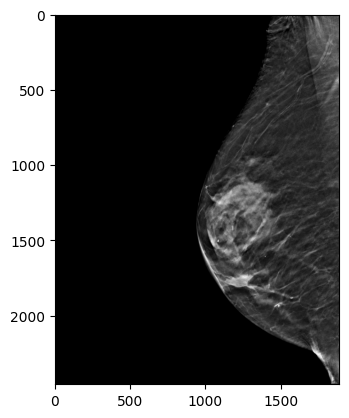

In [ ]:
#plt.imshow(image[0], cmap=plt.cm.gray);
plt.imshow(image, cmap=plt.cm.gray)

In [ ]:
!pip install --upgrade pydicom


In [ ]:
!pip install pylibjpeg


In [ ]:
x, y, width, height = box_series[["X", "Y", "Width", "Height"]]
image = draw_box(image=image, x=x, y=y, width=width, height=height, lw=10)

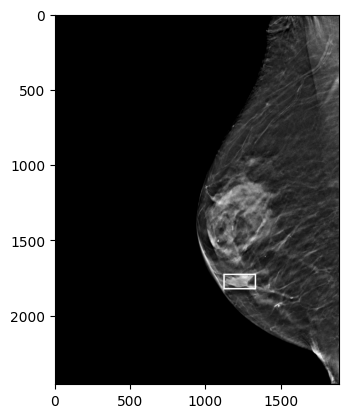

In [ ]:

plt.imshow(image, cmap=plt.cm.gray);

Using tensorflow

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, losses, optimizers
data="/content/drive/MyDrive/data/Breast-Cancer-Screening-DBT"
# Define a simple neural network model
class SimpleModel(tf.keras.Model):
    def __init__(self):
        super(SimpleModel, self).__init__()
        self.flatten = layers.Flatten()
        self.fc1 = layers.Dense(128, activation='relu')
        self.fc2 = layers.Dense(10, activation='softmax')

    def call(self, x):
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.fc2(x)
        return x

# Instantiate the model
model = SimpleModel()

# Compile the model
model.compile(optimizer=optimizers.SGD(learning_rate=0.001),
              loss=losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

# Create a TensorFlow dataset from your data
# Assuming `data` is a tuple of (inputs, labels)
dataset = tf.data.Dataset.from_tensor_slices((data, labels))
# Shuffle and batch the dataset
batch_size = 32
dataset = dataset.shuffle(buffer_size=len(data)).batch(batch_size)

# Training loop
num_epochs = 10
for epoch in range(num_epochs):
    running_loss = 0.0
    for i, (inputs, labels) in enumerate(dataset):
        # Forward pass
        with tf.GradientTape() as tape:
            outputs = model(inputs)
            loss = losses.sparse_categorical_crossentropy(labels, outputs)
            loss = tf.reduce_mean(loss)

        # Backward pass and optimization
        gradients = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(gradients, model.trainable_variables))

        # Print statistics
        running_loss += loss.numpy()
        if i % 100 == 99:  # Print every 100 mini-batches
            print(f'Epoch [{epoch+1}/{num_epochs}], Batch [{i+1}/{len(dataset)}], Loss: {running_loss/100:.4f}')
            running_loss = 0.0

print('Training finished.')

NameError: name 'labels' is not defined

#Using Pytorch - transforms and

In [ ]:
preprocessing=Main("/content/drive/MyDrive/MSMR/Dataset/DICOM/Breast-Cancer-Screening-DBT", "/content/drive/MyDrive/MSMR/Dataset/PNG_NEW")
preprocessing.dcm_to_png()
preprocessing.resizing()
preprocessing.gray_scale_conversion()
preprocessing.count()

In [ ]:
import torch
from torchvision.transforms.functional import to_tensor
from torch.utils.data import Dataset
from PIL import Image

class CustomDataset(Dataset):
    def __init__(self, data, transform=None):
        self.data = data
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        # Load image and bounding box annotations
        image_path = self.data[idx]['image_path']
        bbox = self.data[idx]['bbox']
        image = Image.open(image_path).convert("RGB")

        # Apply transformations
        if self.transform:
            image = self.transform(image)

        # Convert bounding box to tensor
        bbox = torch.tensor(bbox, dtype=torch.float32)
        return image, bbox

# Example usage
data = [{'image_path': image_path, 'bbox': [x, y, width, height]}, ...]
transform = transforms.Compose([transforms.Resize((224, 224)), transforms.ToTensor()])
dataset = CustomDataset(data, transform=transform)


In [ ]:
import torch
from torch.utils.data import Dataset
from torchvision.transforms.functional import to_tensor
import pydicom
from PIL import Image
import numpy as np

class CustomDataset(Dataset):
    def __init__(self, data, transform=None):
        self.data = data
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        # Load DICOM file and bounding box annotations
        dicom_path = self.data[idx]['image_path']
        bbox = self.data[idx]['bbox']
        ds = pydicom.dcmread(dicom_path)

        # Convert DICOM pixel array to a NumPy array and normalize
        pixel_array = ds.pixel_array.astype(np.float32)
        pixel_array = (pixel_array - np.min(pixel_array)) / (np.max(pixel_array) - np.min(pixel_array)) * 255
        pixel_array = pixel_array.astype(np.uint8)

        # Convert NumPy array to a PIL image
        image = Image.fromarray(pixel_array)

        # Apply transformations
        if self.transform:
            image = self.transform(image)

        # Convert bounding box to tensor
        bbox = torch.tensor(bbox, dtype=torch.float32)
        return image, bbox


In [ ]:
from sklearn.model_selection import train_test_split

# Assuming data is your original dataset
# Split the data into training and validation sets
train_data, val_data = train_test_split(data, test_size=0.2, random_state=42)

# Example usage
transform = transforms.Compose([transforms.Resize((224, 224)), transforms.ToTensor()])
train_data = CustomDataset(train_data, transform=transform)
val_data = CustomDataset(val_data, transform=transform)


In [ ]:
from torch.utils.data import DataLoader
from torchvision import transforms
#from your_dataset_module import YourDatasetClass

# Define transformations
transform = transforms.Compose([
    transforms.ToTensor(),
    # Add more transformations as needed
])

# Create instances of your dataset for training and validation
train_dataset = CustomDataset(train_data, transform=transform)
val_dataset = CustomDataset(val_data, transform=transform)

# Define batch size
batch_size = 32

# Create data loaders
train_data_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_data_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)


In [ ]:
import torch
from torchvision import transforms
from torchvision.models.detection import fasterrcnn_resnet50_fpn
from torchvision.models.detection.rpn import AnchorGenerator
from torchvision.models.detection import FasterRCNN
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from torch.utils.data import DataLoader

# Define your dataset and data loaders here
# Assume you have a dataset class named 'CustomDataset' and have created data loaders for training and validation sets

# Assuming 'train_data_loader' and 'val_data_loader' are already defined
# Define the model
model = fasterrcnn_resnet50_fpn(pretrained=True)
num_classes = 2  # Example: 2 classes ('cat', 'dog')
in_features = model.roi_heads.box_predictor.cls_score.in_features
model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)

# Define the optimizer
params = [p for p in model.parameters() if p.requires_grad]
optimizer = torch.optim.SGD(params, lr=0.005, momentum=0.9, weight_decay=0.0005)

# Define the learning rate scheduler (optional)
lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=3, gamma=0.1)

# Train the model
num_epochs = 10
for epoch in range(num_epochs):
    # Training loop
    model.train()
    for images, targets in train_data_loader:
        optimizer.zero_grad()
        loss_dict = model(images, targets)
        losses = sum(loss for loss in loss_dict.values())
        losses.backward()
        optimizer.step()

    # Update the learning rate
    lr_scheduler.step()

    # Validation loop (evaluate the model)
    model.eval()
    for images, targets in val_data_loader:
        with torch.no_grad():
            outputs = model(images)
            # Process the outputs as needed for evaluation

# Save the trained model
torch.save(model.state_dict(), 'faster_rcnn_model.pth')


TypeError: Cannot handle this data type: (1, 1, 1890), |u1